## Credit Risk Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
import warnings

warnings.filterwarnings('ignore')


In [2]:
train_input = pd.read_csv('Credit_Risk_Train_Data.csv')
test_input = pd.read_csv('Credit_Risk_Validate_Data.csv')

In [3]:
print(train_input.columns)
print(test_input.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'outcome'],
      dtype='object')


In [4]:
# the last column has diffrent name lets make the same and then merge
test_input.rename(columns = {'outcome':'Loan_Status'}, inplace = True)

In [5]:
data_all = pd.concat([train_input, test_input], axis = 0)
data_all.shape

(981, 13)

In [6]:
data_all.reset_index(inplace = True, drop = True)
print(data_all.tail())

      Loan_ID Gender Married Dependents     Education Self_Employed  \
976  LP002971   Male     Yes         3+  Not Graduate           Yes   
977  LP002975   Male     Yes          0      Graduate            No   
978  LP002980   Male      No          0      Graduate            No   
979  LP002986   Male     Yes          0      Graduate            No   
980  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
976             4009             1777.0       113.0             360.0   
977             4158              709.0       115.0             360.0   
978             3250             1993.0       126.0             360.0   
979             5000             2393.0       158.0             360.0   
980             9200                0.0        98.0             180.0   

     Credit_History Property_Area Loan_Status  
976             1.0         Urban           Y  
977             1.0         Urban     

In [7]:
data_all.isnull().sum() # gives missing values of all columns

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

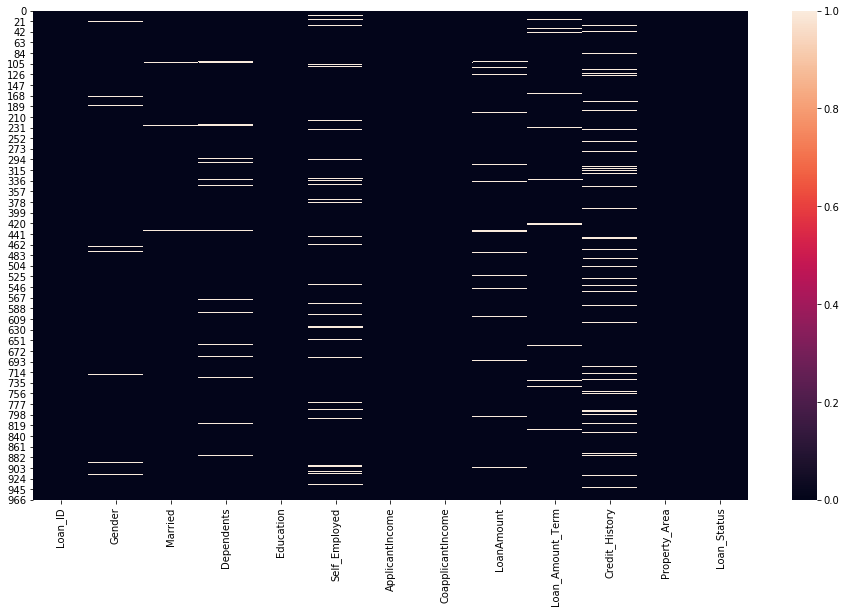

In [8]:
plt.figure(figsize=(16,9))
sns.heatmap(data_all.isnull())  # ----- line indecate by null value

In [9]:
data_all.shape

(981, 13)

In [10]:
# before proceding with model building lets fill the missing values
Counter(data_all['Gender'])

Counter({'Male': 775, 'Female': 182, nan: 24})

In [11]:
gender_null = data_all[data_all['Gender'].isnull()].index.tolist()
print(gender_null)

[23, 126, 171, 188, 314, 334, 460, 467, 477, 507, 576, 588, 592, 636, 665, 720, 752, 823, 845, 859, 893, 910, 917, 932]


In [12]:
# gender_null_M = gender_null[:12]
# gender_null_F = gender_null[12:]
# data_all['Gender'].iloc[gender_null_M] = 'Male'
# data_all['Gender'].iloc[gender_null_F] = 'Female'


In [13]:
data_all['Gender'].iloc[gender_null] = 'Male'

In [14]:
print(sum(data_all['Gender'].isnull()))
Counter(data_all['Gender'])

0


Counter({'Male': 799, 'Female': 182})

In [15]:
print(Counter(data_all['Married']))

Counter({'Yes': 631, 'No': 347, nan: 3})


In [16]:
married_null = data_all[data_all['Married'].isnull()].index.tolist()
married_null

[104, 228, 435]

In [17]:
data_all['Married'].iloc[married_null] = 'Yes'

In [18]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
Counter(data_all['Dependents'])  

Counter({'0': 545, '1': 160, '2': 160, '3+': 91, nan: 25})

In [20]:
# lets see the dependent with married
pd.crosstab(data_all['Married'], data_all['Dependents'].isnull())

Dependents,False,True
Married,,
No,338,9
Yes,618,16


In [21]:
pd.crosstab(data_all['Dependents'], data_all['Married'])

Married,No,Yes
Dependents,,
0,276,269
1,36,124
2,14,146
3+,12,79


In [22]:
# for the bachlor, lets fill the missing dependents as 0
bachlor_nulldependent = data_all[(data_all['Married'] == 'No') & (data_all['Dependents'].isnull())].index.tolist()
print(bachlor_nulldependent)

[293, 332, 355, 597, 684, 752, 879, 916, 926]


In [23]:
data_all['Dependents'].iloc[bachlor_nulldependent] = '0'

In [24]:
Counter(data_all['Dependents'])

Counter({'0': 554, '1': 160, '2': 160, '3+': 91, nan: 16})

In [25]:
# for the remaining 16 dependent lets see how dependents male and female
pd.crosstab(data_all['Gender'], data_all['Dependents'])

Dependents,0,1,2,3+
Gender,,,,
Female,127,32,13,9
Male,427,128,147,82


In [26]:
pd.crosstab(data_all['Gender'], data_all['Dependents'].isnull())

Dependents,False,True
Gender,,
Female,181,1
Male,784,15


In [27]:
# So female have less dependents lets see the gender of the  16 missing dependents
data_all['Gender'].iloc[data_all[data_all['Dependents'].isnull()].index.tolist()]

102      Male
104      Male
120      Male
226      Male
228      Male
301      Male
335      Male
346      Male
435    Female
517      Male
571      Male
660      Male
725      Male
816      Male
861      Male
865      Male
Name: Gender, dtype: object

In [28]:
pd.crosstab((data_all['Gender'] == 'Male') & (data_all['Married'] == 'Yes'), data_all['Dependents'])

Dependents,0,1,2,3+
row_0,,,,
False,318,48,23,15
True,236,112,137,76


In [29]:
# lets sfill the # dependents with 1
data_all['Dependents'].iloc[data_all[data_all['Dependents'].isnull()].index.tolist()] = '1'

In [30]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
Counter(data_all['Self_Employed'])

Counter({'No': 807, 'Yes': 119, nan: 55})

In [32]:
self_emp_null = data_all[data_all['Self_Employed'].isnull()].index.tolist()

In [33]:
# fill missing self emp with no
data_all['Self_Employed'].iloc[self_emp_null] = 'No'

In [34]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
pd.crosstab(data_all['LoanAmount'].isnull(), data_all['Loan_Amount_Term'].isnull())

Loan_Amount_Term,False,True
LoanAmount,,
False,934,20
True,27,0


In [36]:
pd.crosstab(data_all['LoanAmount'].isnull(), data_all['Loan_Amount_Term'])

Loan_Amount_Term,6.0,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,350.0,360.0,480.0
LoanAmount,,,,,,,,,,,,
False,1,2,3,3,7,4,64,7,20,1,800,22
True,0,0,0,0,0,0,2,1,0,0,23,1


In [37]:
data_all.groupby(data_all['Loan_Amount_Term'])['LoanAmount'].mean()

Loan_Amount_Term
6.0       95.000000
12.0     185.500000
36.0     117.666667
60.0     139.666667
84.0     121.142857
120.0     36.750000
180.0    131.125000
240.0    128.857143
300.0    166.250000
350.0    133.000000
360.0    144.420000
480.0    137.181818
Name: LoanAmount, dtype: float64

In [38]:
data_all['LoanAmount'][(data_all['LoanAmount'].isnull()) & (data_all['Loan_Amount_Term'] == 360)] = 144
data_all['LoanAmount'][(data_all['LoanAmount'].isnull()) & (data_all['Loan_Amount_Term'] == 480)] = 137

In [39]:
data_all['Loan_Amount_Term'][(data_all['LoanAmount'].isnull())] = 130

In [40]:
(data_all['Loan_Amount_Term']).value_counts()

360.0    823
180.0     64
480.0     23
300.0     20
84.0       7
240.0      7
120.0      4
36.0       3
130.0      3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [41]:
# lets fill the loan tenre by mode
data_all['Loan_Amount_Term'][data_all['Loan_Amount_Term'].isnull()] = 360

In [42]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            3
Loan_Amount_Term      0
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
data_all['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [44]:
pd.crosstab(data_all['Gender'], data_all['Credit_History'])

Credit_History,0.0,1.0
Gender,,
Female,30,135
Male,118,619


In [45]:
pd.crosstab(data_all['Self_Employed'], data_all['Credit_History'])

Credit_History,0.0,1.0
Self_Employed,,
No,134,658
Yes,14,96


In [46]:
pd.crosstab(data_all['Education'], data_all['Credit_History'])

Credit_History,0.0,1.0
Education,,
Graduate,106,596
Not Graduate,42,158


In [47]:
pd.crosstab(data_all['Married'], data_all['Credit_History'])

Credit_History,0.0,1.0
Married,,
No,56,263
Yes,92,491


In [48]:
data_all['Credit_History'][data_all['Credit_History'].isnull()] = 1

In [49]:
data_all.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           3
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [50]:
data_all['LoanAmount'].fillna(140, inplace = True)

In [51]:
data_all.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

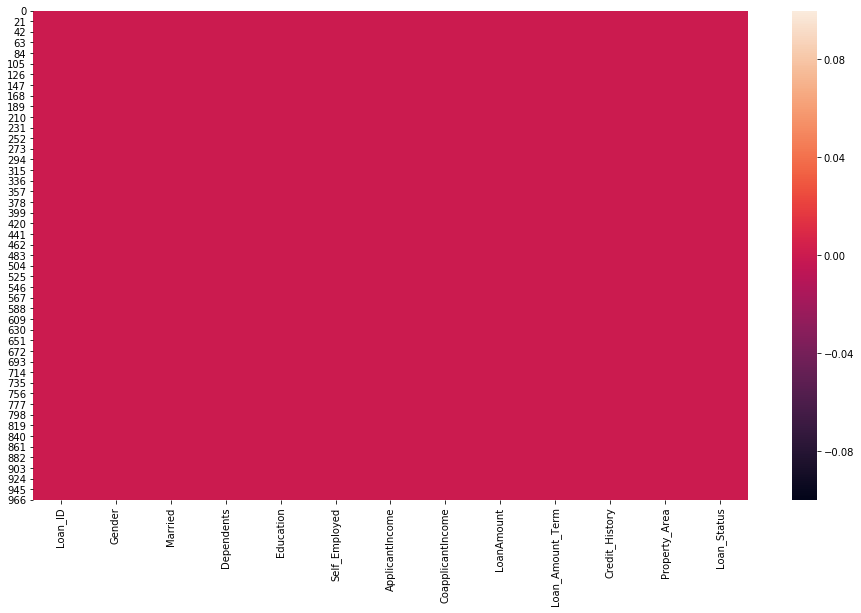

In [52]:
plt.figure(figsize=(16,9))
sns.heatmap(data_all.isnull())  #clean all data  ready to prediction 

In [53]:
data_all.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,144.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
data_all_new = pd.get_dummies(data_all.drop(['Loan_ID'], axis = 1), drop_first = True)

In [55]:
data_all_new.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,144.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [56]:
x = data_all_new.drop(['Loan_Status_Y'], axis=1)
y = data_all_new['Loan_Status_Y']

In [57]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,144.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1


In [58]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status_Y, dtype: uint8

In [59]:
### Train and test split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [62]:
x_train.shape

(735, 14)

In [63]:
x_test.shape

(246, 14)

In [64]:
### Data preprocessing

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

In [67]:
# Fit only to the training data
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [68]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [69]:
x_train[:5]

array([[ 0.23193223, -0.5895062 ,  0.01922264,  0.27145694,  0.42151046,
         0.47726799,  0.73980985, -0.46758266, -0.44145701, -0.31976115,
        -0.53452248, -0.37155221, -0.74311183,  1.36690199],
       [-0.45620228,  0.20795114, -0.50495839,  0.27145694,  0.42151046,
         0.47726799, -1.35169869, -0.46758266, -0.44145701, -0.31976115,
         1.87082869,  2.6914118 , -0.74311183, -0.73158135],
       [-0.00980203, -0.5895062 , -0.24286788,  0.27145694, -2.37242036,
         0.47726799, -1.35169869, -0.46758266, -0.44145701, -0.31976115,
        -0.53452248, -0.37155221, -0.74311183, -0.73158135],
       [-0.50433832, -0.12766542, -0.22976335,  0.27145694, -2.37242036,
         0.47726799,  0.73980985, -0.46758266,  2.26522626, -0.31976115,
         1.87082869, -0.37155221, -0.74311183, -0.73158135],
       [-0.16685902, -0.5895062 , -0.40012219,  0.27145694,  0.42151046,
        -2.09525891, -1.35169869, -0.46758266, -0.44145701, -0.31976115,
        -0.53452248, -0.37

In [70]:
#plt.figure(figsize=(16,9))
#plt.hist(x_train)

In [71]:
### Trainig model in svm

In [72]:
from sklearn import svm

In [73]:
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

(array([ 39.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 207.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

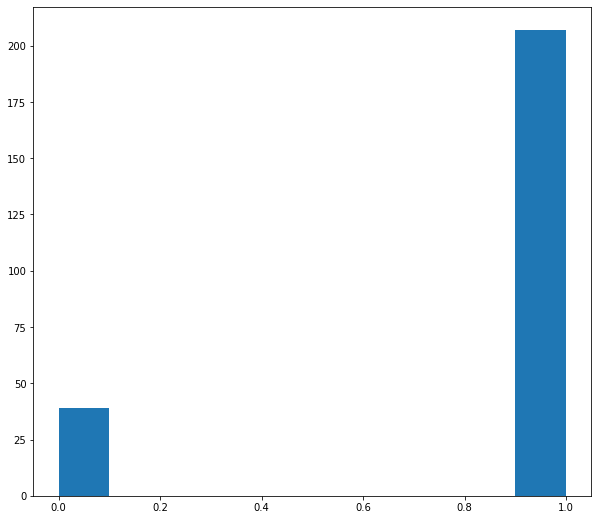

In [74]:
predictions = clf.predict(x_test)

plt.figure(figsize=(10,9))
plt.hist(predictions)

In [75]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

In [76]:
print(confusion_matrix(y_test, predictions))            



[[ 36  30]
 [  3 177]]


In [77]:
print(classification_report(y_test, predictions ))


              precision    recall  f1-score   support

           0       0.92      0.55      0.69        66
           1       0.86      0.98      0.91       180

    accuracy                           0.87       246
   macro avg       0.89      0.76      0.80       246
weighted avg       0.87      0.87      0.85       246



In [78]:
accuracy_score(y_test, predictions)

0.8658536585365854

## Confusion Matrix

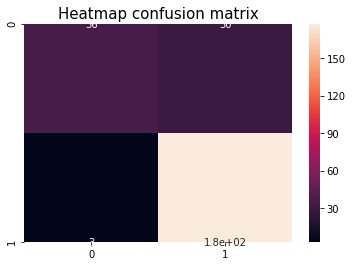

In [79]:
sm=confusion_matrix(y_test, predictions)
plt.title("Heatmap confusion matrix", fontsize=15)
sns.heatmap(sm,annot=True)
plt.show()

In [80]:
## Pickle
import pickle

# save model
pickle.dump(clf, open('Predict_loan.pickle', 'wb'))

# load model
loan_predict_model = pickle.load(open('Predict_loan.pickle', 'rb'))

# predict the output
y_pred = loan_predict_model.predict(x_test)

# confusion matrix
print('Confusion matrix of SVC model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of SVC model = ',accuracy_score(y_test, y_pred))
#

Confusion matrix of SVC model: 
 [[ 36  30]
 [  3 177]] 

Accuracy of SVC model =  0.8658536585365854
